ИУ5-62Б Еремихин Владислав Станиславович РК1 Вариант 7

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
from sklearn.impute import SimpleImputer
from functools import cmp_to_key

In [2]:
df = pd.read_csv('googleplaystore.csv', sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [5]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Видно, что больше всего пропущенных значений в колонке 'Rating'. Выполним импьютацию медианного значения (также, избавимся от выпадающего из диапазона значения):

In [6]:
ratings = df[['Rating']]
print(ratings)
print(np.unique(ratings))

       Rating
0         4.1
1         3.9
2         4.7
3         4.5
4         4.3
...       ...
10836     4.5
10837     5.0
10838     NaN
10839     4.5
10840     4.5

[10841 rows x 1 columns]
[ 1.   1.2  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.  19.   nan]


In [7]:
# Выполним импьютацию
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(ratings)
ratings = imp_mean.transform(ratings)
print(np.unique(ratings))
# Уберем некачественные значения
for i in range(len(ratings)):
    if ratings[i] > 5.:
        ratings[i] = 5.
print(np.unique(ratings))
df['Rating'] = ratings


[ 1.   1.2  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5
  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.  19. ]
[1.  1.2 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9
 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7
 4.8 4.9 5. ]


Заметим, что в остальных колонках количество пропущенных значений несущественно относительно общего количество строк в датасете, так что просто избавимся от них:

In [8]:
df = df.dropna()
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Теперь, приступим к подготовке к анализу. В датасете изначально только один числовой признак, но при этом большинство категориальных признаков можно разумно привести к числовым.

In [9]:
# Начнем с количества установок
unique_installs = np.unique(df['Installs'])
unique_installs

array(['0+', '1+', '1,000+', '1,000,000+', '1,000,000,000+', '10+',
       '10,000+', '10,000,000+', '100+', '100,000+', '100,000,000+', '5+',
       '5,000+', '5,000,000+', '50+', '50,000+', '50,000,000+', '500+',
       '500,000+', '500,000,000+'], dtype=object)

In [10]:
def installs_to_int(installs):
    return int(''.join(installs[:-1].split(',')))

def compare_installs(x, y):
    return installs_to_int(x) - installs_to_int(y)

sorted_unique_installs_values = sorted(list(map(installs_to_int, unique_installs)))
sorted_unique_installs = sorted(unique_installs, key=cmp_to_key(compare_installs))
installs_order_map = {sorted_unique_installs[i]: sorted_unique_installs_values[i] for i in range(len(sorted_unique_installs))}

installs_order_map

{'0+': 0,
 '1+': 1,
 '5+': 5,
 '10+': 10,
 '50+': 50,
 '100+': 100,
 '500+': 500,
 '1,000+': 1000,
 '5,000+': 5000,
 '10,000+': 10000,
 '50,000+': 50000,
 '100,000+': 100000,
 '500,000+': 500000,
 '1,000,000+': 1000000,
 '5,000,000+': 5000000,
 '10,000,000+': 10000000,
 '50,000,000+': 50000000,
 '100,000,000+': 100000000,
 '500,000,000+': 500000000,
 '1,000,000,000+': 1000000000}

In [11]:
# Применим словарь преобразований к признаку
df['Installs'] = df['Installs'].map(installs_order_map)
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10829, dtype: int64

In [12]:
# Далее, разберёмся с колонкой 'Type' 
ut = np.unique(df['Type'])
ut

array(['Free', 'Paid'], dtype=object)

In [13]:
# В данном случае просто превратить данное поле в bool и переименовать его для лучшей реперезентативности (это также оптимизирует работу с датасетом).
def type_to_bool(type):
    return True if type == 'Free' else False

df['Type'] = list(map(type_to_bool,df['Type']))
df.rename(columns={'Type': 'IsFree'}, inplace=True)
df['IsFree']

0        True
1        True
2        True
3        True
4        True
         ... 
10836    True
10837    True
10838    True
10839    True
10840    True
Name: IsFree, Length: 10829, dtype: bool

In [14]:
# Для цен приложений сделаем то же самое, что и с количеством установок
up = np.unique(df['Price'])
up

array(['$0.99', '$1.00', '$1.04', '$1.20', '$1.26', '$1.29', '$1.49',
       '$1.50', '$1.59', '$1.61', '$1.70', '$1.75', '$1.76', '$1.96',
       '$1.97', '$1.99', '$10.00', '$10.99', '$109.99', '$11.99',
       '$12.99', '$13.99', '$14.00', '$14.99', '$15.46', '$15.99',
       '$154.99', '$16.99', '$17.99', '$18.99', '$19.40', '$19.90',
       '$19.99', '$2.00', '$2.49', '$2.50', '$2.56', '$2.59', '$2.60',
       '$2.90', '$2.95', '$2.99', '$200.00', '$24.99', '$25.99', '$28.99',
       '$29.99', '$299.99', '$3.02', '$3.04', '$3.08', '$3.28', '$3.49',
       '$3.61', '$3.88', '$3.90', '$3.95', '$3.99', '$30.99', '$33.99',
       '$37.99', '$379.99', '$389.99', '$39.99', '$394.99', '$399.99',
       '$4.29', '$4.49', '$4.59', '$4.60', '$4.77', '$4.80', '$4.84',
       '$4.85', '$4.99', '$400.00', '$46.99', '$5.00', '$5.49', '$5.99',
       '$6.49', '$6.99', '$7.49', '$7.99', '$74.99', '$79.99', '$8.49',
       '$8.99', '$89.99', '$9.00', '$9.99', '0'], dtype=object)

In [15]:
up = np.unique(df['Price'])
def price_to_float(price):
    return .0 if price == 'Everyone' or price == '0' else float(price[1:])

sorted_unique_prices_values = sorted(list(map(price_to_float, up)))

def compare_prices(x, y):
    return price_to_float(x) - price_to_float(y)

sorted_unique_prices = sorted(up, key=cmp_to_key(compare_prices))

prices_order_map = {sorted_unique_prices[i]: sorted_unique_prices_values[i] for i in range(len(sorted_unique_prices))}
prices_order_map

{'0': 0.0,
 '$0.99': 0.99,
 '$1.00': 1.0,
 '$1.04': 1.04,
 '$1.20': 1.2,
 '$1.26': 1.26,
 '$1.29': 1.29,
 '$1.49': 1.49,
 '$1.50': 1.5,
 '$1.59': 1.59,
 '$1.61': 1.61,
 '$1.70': 1.7,
 '$1.75': 1.75,
 '$1.76': 1.76,
 '$1.96': 1.96,
 '$1.97': 1.97,
 '$1.99': 1.99,
 '$2.00': 2.0,
 '$2.49': 2.49,
 '$2.50': 2.5,
 '$2.56': 2.56,
 '$2.59': 2.59,
 '$2.60': 2.6,
 '$2.90': 2.9,
 '$2.95': 2.95,
 '$2.99': 2.99,
 '$3.02': 3.02,
 '$3.04': 3.04,
 '$3.08': 3.08,
 '$3.28': 3.28,
 '$3.49': 3.49,
 '$3.61': 3.61,
 '$3.88': 3.88,
 '$3.90': 3.9,
 '$3.95': 3.95,
 '$3.99': 3.99,
 '$4.29': 4.29,
 '$4.49': 4.49,
 '$4.59': 4.59,
 '$4.60': 4.6,
 '$4.77': 4.77,
 '$4.80': 4.8,
 '$4.84': 4.84,
 '$4.85': 4.85,
 '$4.99': 4.99,
 '$5.00': 5.0,
 '$5.49': 5.49,
 '$5.99': 5.99,
 '$6.49': 6.49,
 '$6.99': 6.99,
 '$7.49': 7.49,
 '$7.99': 7.99,
 '$8.49': 8.49,
 '$8.99': 8.99,
 '$9.00': 9.0,
 '$9.99': 9.99,
 '$10.00': 10.0,
 '$10.99': 10.99,
 '$11.99': 11.99,
 '$12.99': 12.99,
 '$13.99': 13.99,
 '$14.00': 14.0,
 '$14.99': 14.99

In [16]:
# Применим изменения
df['Price'] = df['Price'].map(prices_order_map)
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10829, dtype: float64

In [17]:
# Признак 'Size'
us = np.unique(df['Size'])
print(us, len(us))

['1.0M' '1.1M' '1.2M' '1.3M' '1.4M' '1.5M' '1.6M' '1.7M' '1.8M' '1.9M'
 '10.0M' '100M' '1020k' '103k' '108k' '10M' '116k' '118k' '11M' '121k'
 '122k' '12M' '13M' '141k' '143k' '144k' '14M' '14k' '153k' '154k' '157k'
 '15M' '160k' '161k' '164k' '169k' '16M' '170k' '172k' '173k' '175k'
 '176k' '17M' '17k' '186k' '18M' '18k' '190k' '191k' '192k' '193k' '196k'
 '19M' '2.0M' '2.1M' '2.2M' '2.3M' '2.4M' '2.5M' '2.6M' '2.7M' '2.8M'
 '2.9M' '200k' '201k' '203k' '206k' '208k' '209k' '20M' '20k' '210k'
 '219k' '21M' '220k' '221k' '226k' '228k' '22M' '232k' '234k' '238k'
 '239k' '23M' '23k' '240k' '241k' '243k' '245k' '246k' '24M' '24k' '251k'
 '253k' '257k' '259k' '25M' '25k' '266k' '269k' '26M' '26k' '270k' '27M'
 '27k' '280k' '283k' '288k' '28M' '28k' '292k' '293k' '29M' '29k' '3.0M'
 '3.1M' '3.2M' '3.3M' '3.4M' '3.5M' '3.6M' '3.7M' '3.8M' '3.9M' '306k'
 '308k' '309k' '30M' '313k' '314k' '317k' '318k' '319k' '31M' '322k'
 '323k' '329k' '32M' '334k' '335k' '33M' '33k' '34M' '34k' '350k' '351k'


In [18]:
# Уберем неизвестные данные
df = df.drop(df[df['Size'] == 'Varies with device'].index)

In [19]:
# Проверим сколько различных приставок размеров в нашем датасете
last_chars = [x[-1] for x in np.unique(df['Size'])]
print(np.unique(last_chars))

['M' 'k']


In [20]:
# Среди даннных существует всего лишь два типа размера: килобайты и мегабайты, так что мы с легкостью напишем функцию преобразования
df['Size'] = list(map(lambda s: int(float(s[:-1])) if s[-1] == 'k' else int(float(s[:-1]) * 1000), df['Size']))
# Тем самым, приведем размеры к численному значению в килобайтах
df['Size']

0        19000
1        14000
2         8700
3        25000
4         2800
         ...  
10835     9600
10836    53000
10837     3600
10838     9500
10840    19000
Name: Size, Length: 9135, dtype: int64

In [21]:
# C 'Reviews' все еще проще
df['Reviews'] = df['Reviews'].apply(int)

In [22]:
# Последний признак, который целесообразно привести к числовому, это 'Android Ver'
uav = np.unique(df['Android Ver'])

print(uav, len(uav))

['1.0 and up' '1.5 and up' '1.6 and up' '2.0 and up' '2.0.1 and up'
 '2.1 and up' '2.2 - 7.1.1' '2.2 and up' '2.3 and up' '2.3.3 and up'
 '3.0 and up' '3.1 and up' '3.2 and up' '4.0 and up' '4.0.3 - 7.1.1'
 '4.0.3 and up' '4.1 - 7.1.1' '4.1 and up' '4.2 and up' '4.3 and up'
 '4.4 and up' '4.4W and up' '5.0 - 6.0' '5.0 - 7.1.1' '5.0 - 8.0'
 '5.0 and up' '5.1 and up' '6.0 and up' '7.0 - 7.1.1' '7.0 and up'
 '7.1 and up' '8.0 and up' 'Varies with device'] 33


In [23]:
# Отбросим данные с неизвестными значениями
df = df.drop(df[df['Android Ver'] == 'Varies with device'].index)
av = df['Android Ver']
print(len(av))
# Приведем все версии с 'and up' к начальной, а все версии с диапазаном - к последней
def format_android_ver(ver):
    if ver.endswith('and up'):
        return ver.split(' ')[0][:-1] if ver.split(' ')[0][-1] == 'W' else ver.split(' ')[0]
    if  '-' in ver:
        return ver.split(' ')[-1]
    return ver

av = list(map(format_android_ver, av))
av = list(map(lambda v: float('.'.join([v.split('.')[0], ''.join(v.split('.')[1:])])), av))

df['Android Ver'] = av
df['Android Ver']

9079


0        4.03
1        4.03
2        4.03
3        4.20
4        4.40
         ... 
10834    4.10
10835    4.00
10836    4.10
10837    4.10
10838    2.20
Name: Android Ver, Length: 9079, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9079 entries, 0 to 10838
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9079 non-null   object 
 1   Category        9079 non-null   object 
 2   Rating          9079 non-null   float64
 3   Reviews         9079 non-null   int64  
 4   Size            9079 non-null   int64  
 5   Installs        9079 non-null   int64  
 6   IsFree          9079 non-null   bool   
 7   Price           9079 non-null   float64
 8   Content Rating  9079 non-null   object 
 9   Genres          9079 non-null   object 
 10  Last Updated    9079 non-null   object 
 11  Current Ver     9079 non-null   object 
 12  Android Ver     9079 non-null   float64
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 931.0+ KB


Мы получили все более-менее осмысленные числовые признаки из датасета. Теперь приступим к корреляционному анализу:

<Axes: >

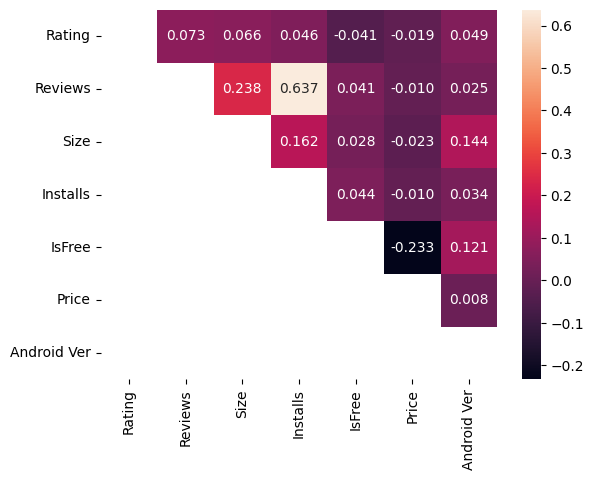

In [25]:
mask = np.zeros_like(df.corr(numeric_only=True), dtype=bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(numeric_only=True), mask=mask, annot=True, fmt='.3f')

Видно, что хорошо коррелируют только размер приложения и количество скачиваний, что наводит на мысли о зависимости этих признаков. Также неплохо коррелируют пары: размер приложения с количеством скачиваний, количество отзывов с размером приложения и версия Android с размером приложения. Скорее всего, данный датасет не подходит для построения моделей машинного обучения (например, в силу отсутствия явных целевых признаков и слабой корреляции представленных (как следствие, и их незначительного вклада в модель)).

Построение гистограммы:

<Axes: xlabel='Rating', ylabel='Density'>

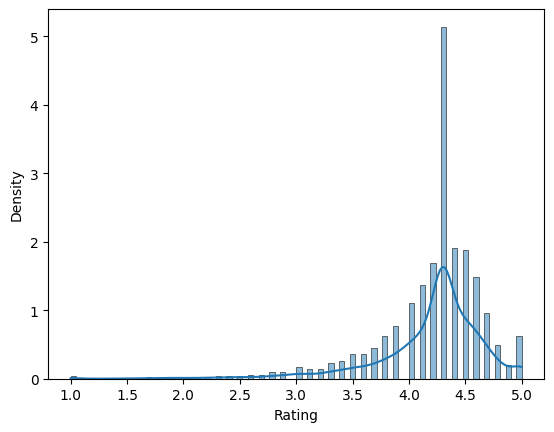

In [26]:

sns.histplot(df['Rating'], kde=True, stat='density')